In [34]:
import pandas as pd

In [41]:
matrix = pd.read_parquet("data/GSE49828_methylation_matrix.parquet")
# List of chromosomes in order
ordered_chrs = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]

# Make it a Categorical for correct sorting
matrix["chr"] = pd.Categorical(matrix["chr"], categories=ordered_chrs, ordered=True)
matrix.head()

,chr,cpg_pos,1st_PB1,1st_PB2,1st_PB3,2-cell1,2-cell2,2nd_PB1,2nd_PB2,4-cell1,...,Postimplantation_embryo3,Sperm1,Sperm2,Sperm3,Sperm4,TE1,TE2,TE3,Zygote1,Zygote2
0,chr1,10609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,10617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,10620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,10631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,10867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


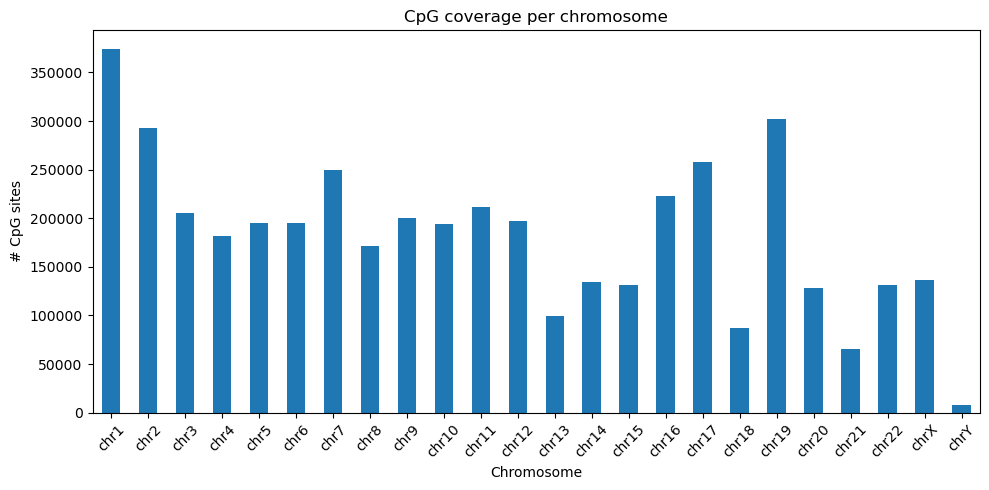

In [42]:
counts = matrix["chr"].value_counts().sort_index()

counts.plot(kind="bar", figsize=(10, 5))
plt.title("CpG coverage per chromosome")
plt.xlabel("Chromosome")
plt.ylabel("# CpG sites")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


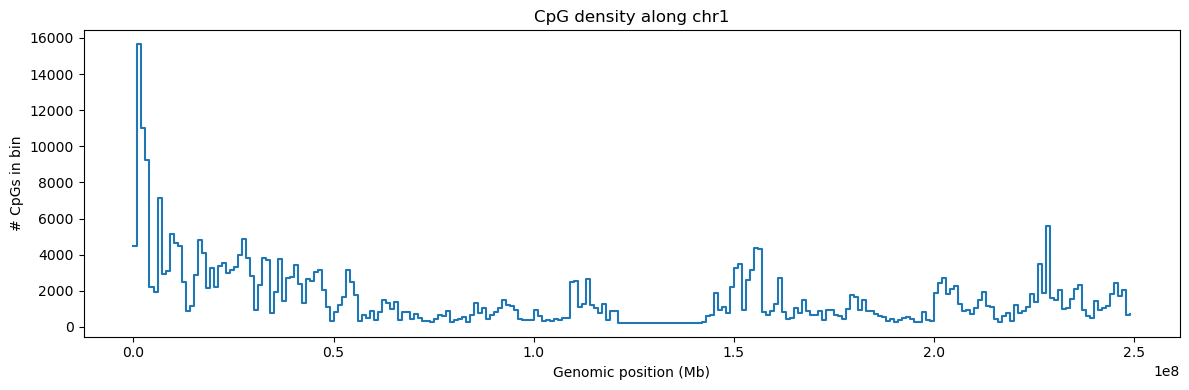

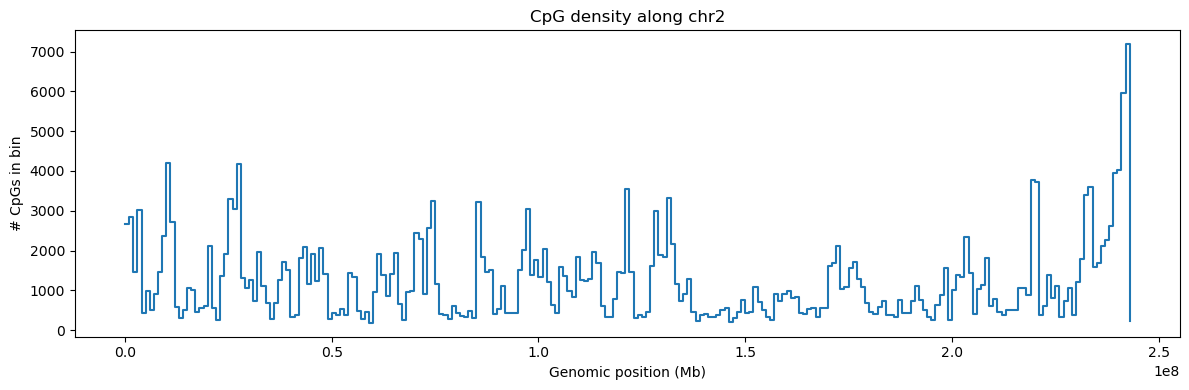

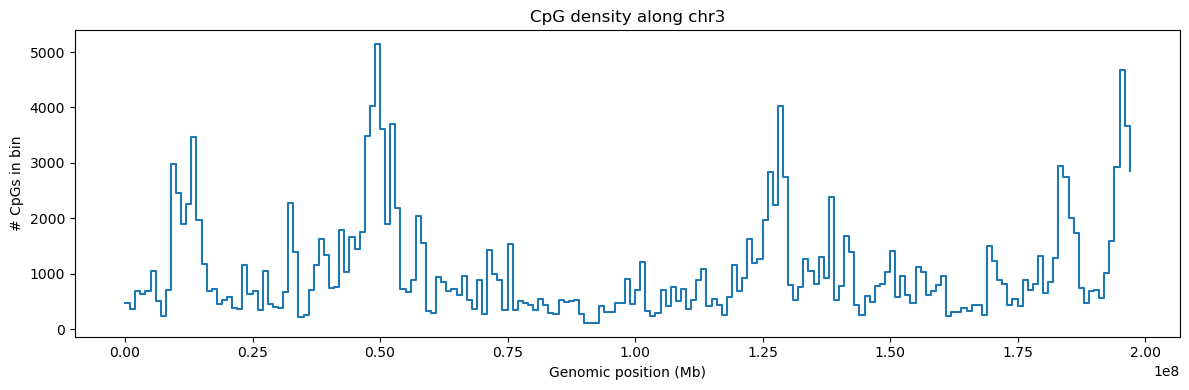

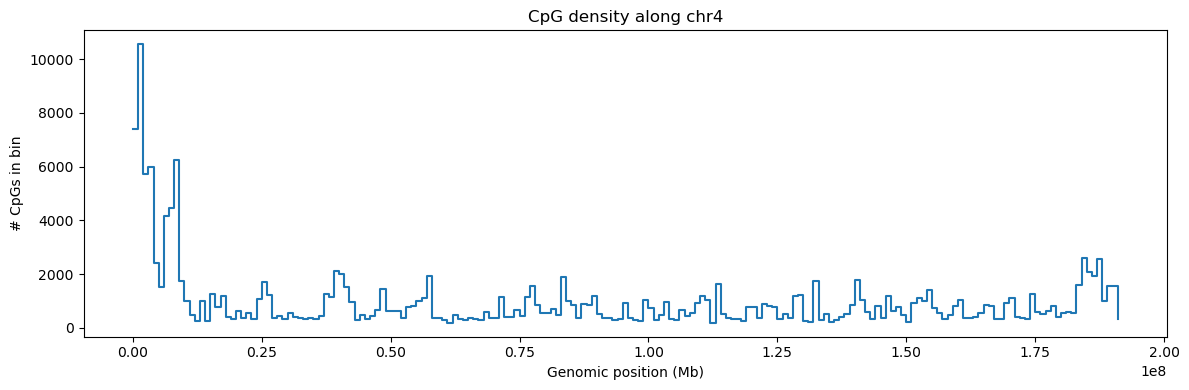

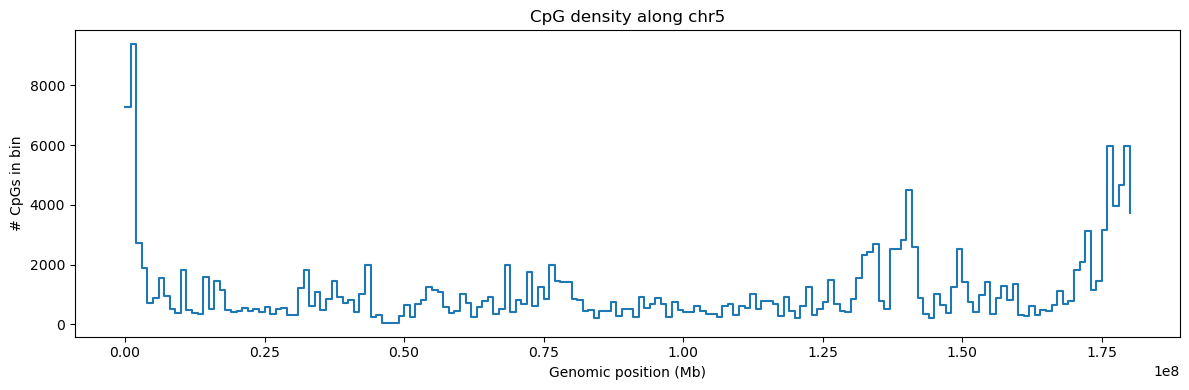

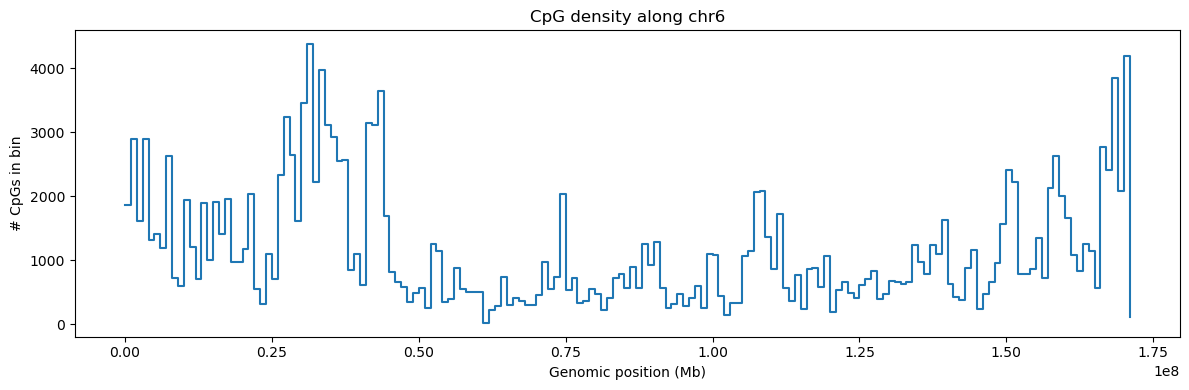

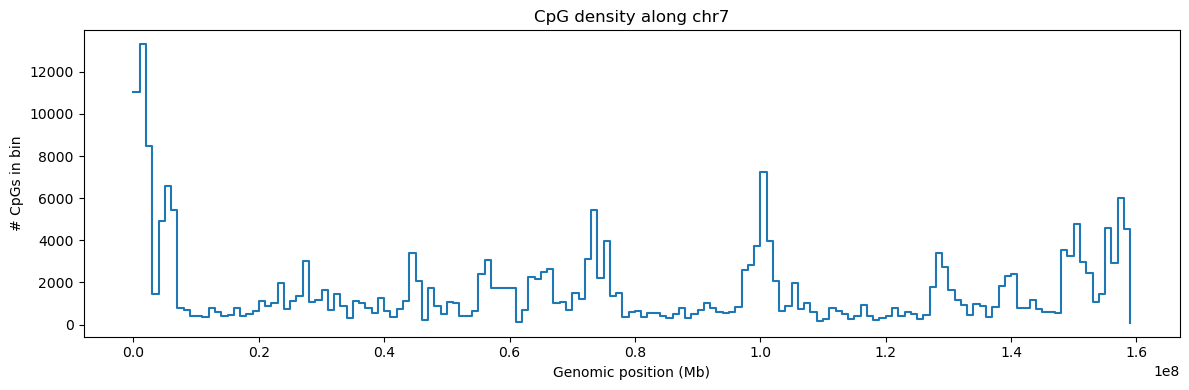

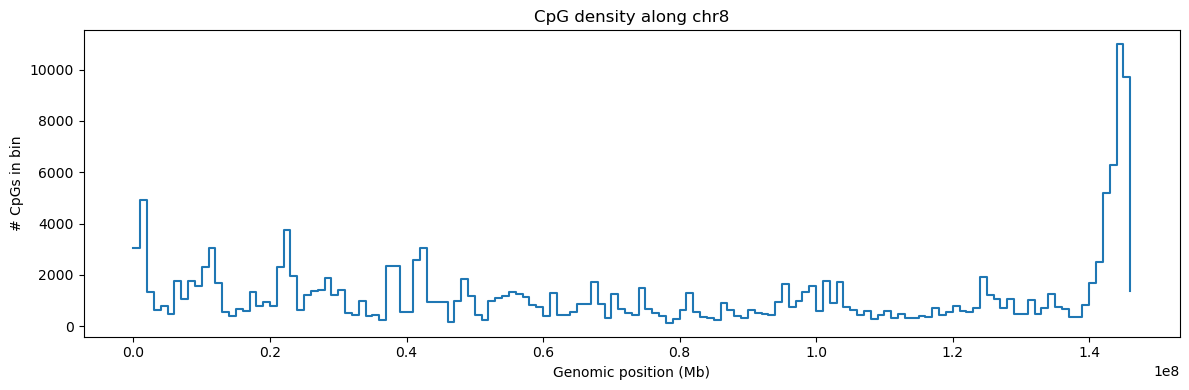

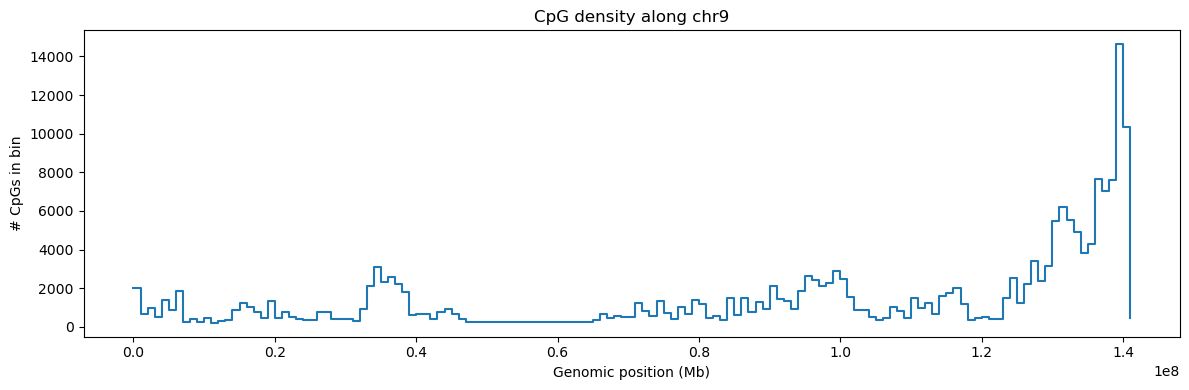

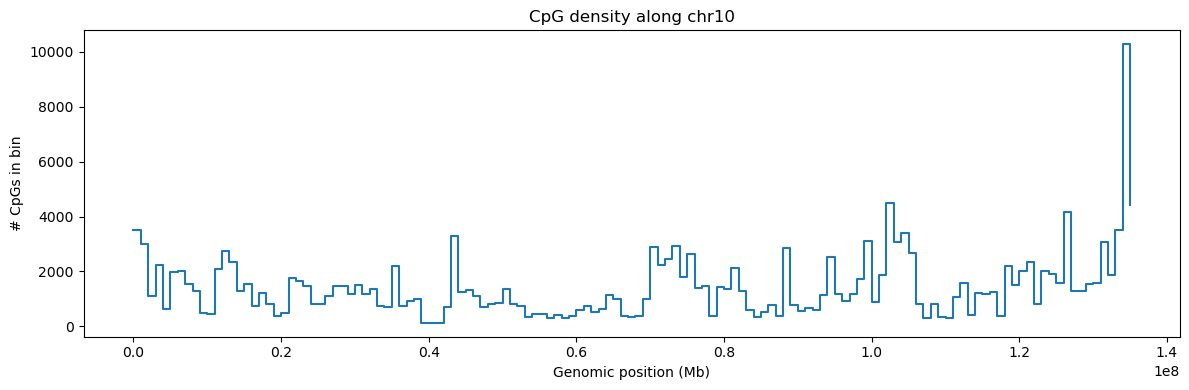

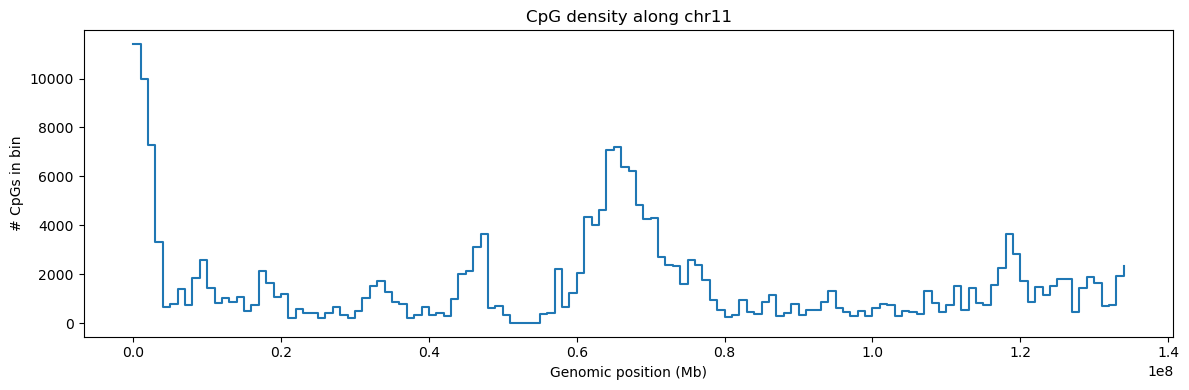

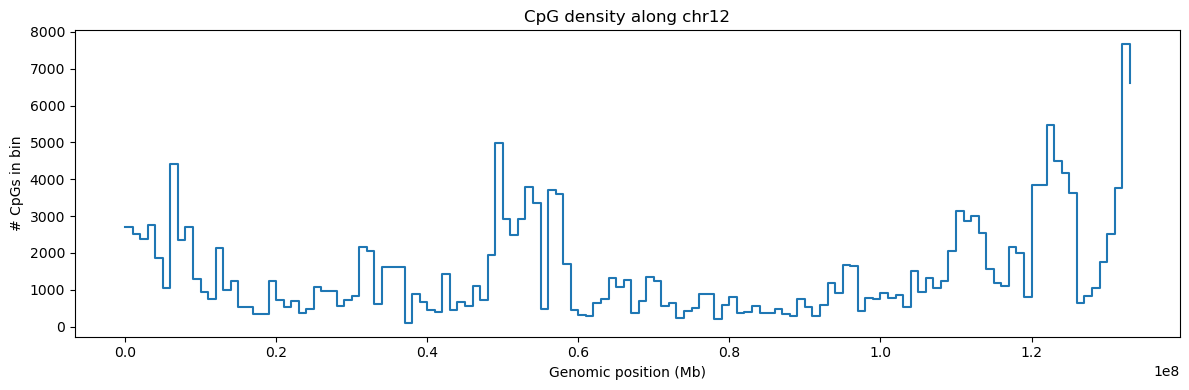

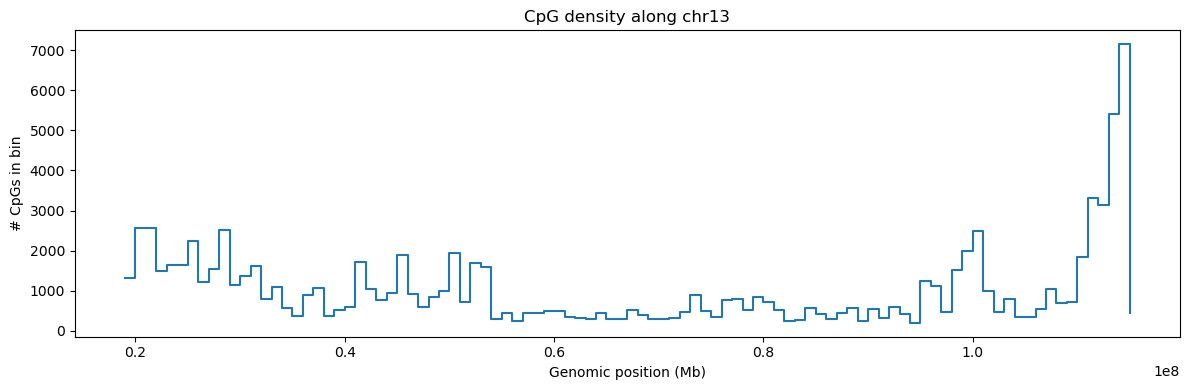

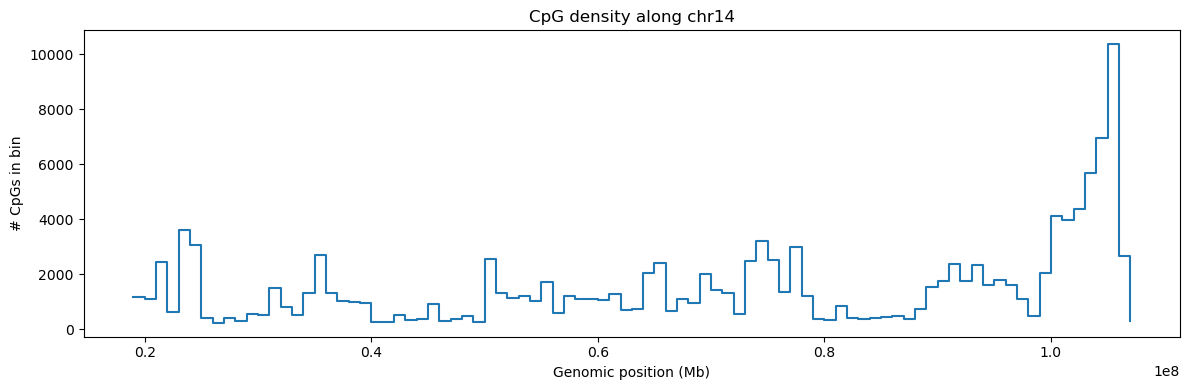

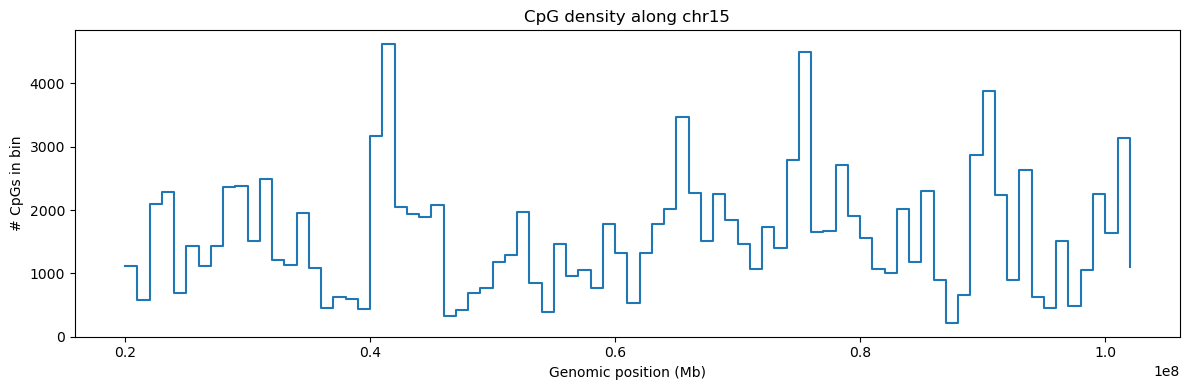

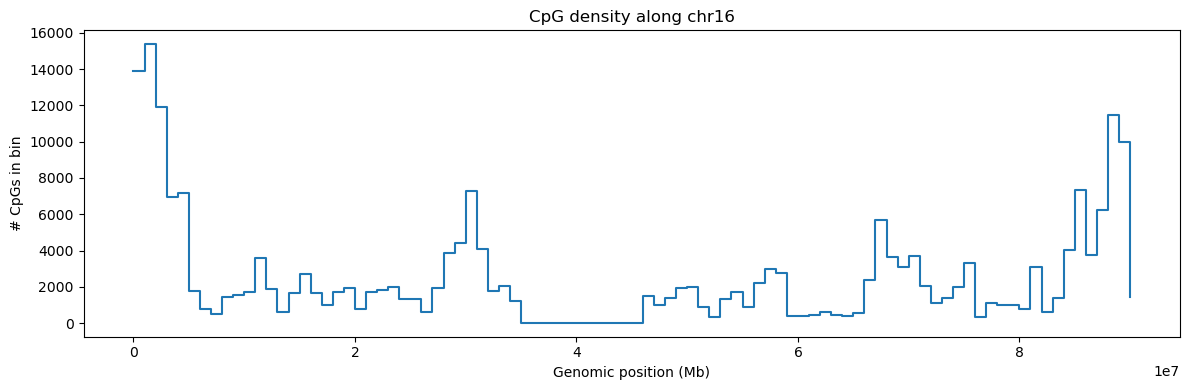

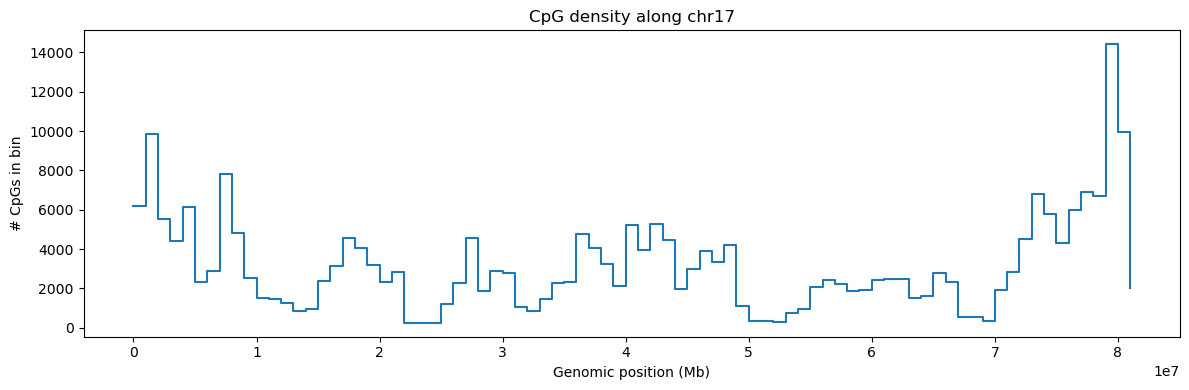

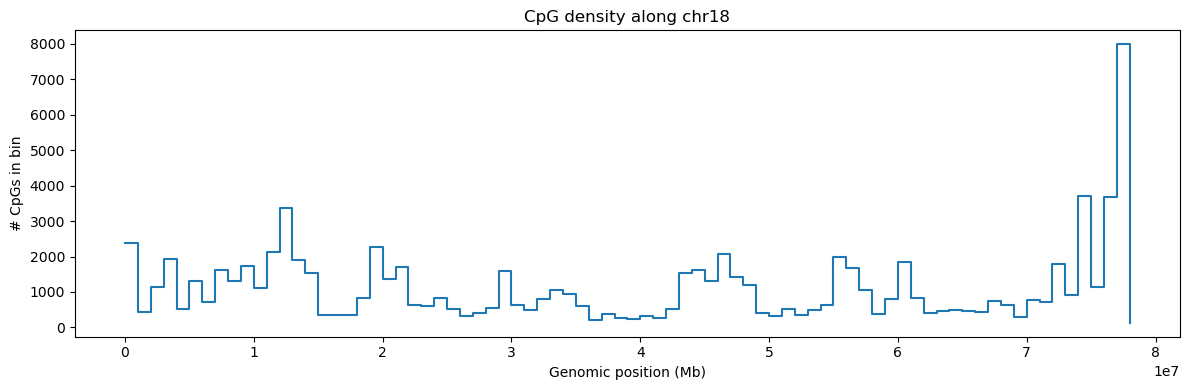

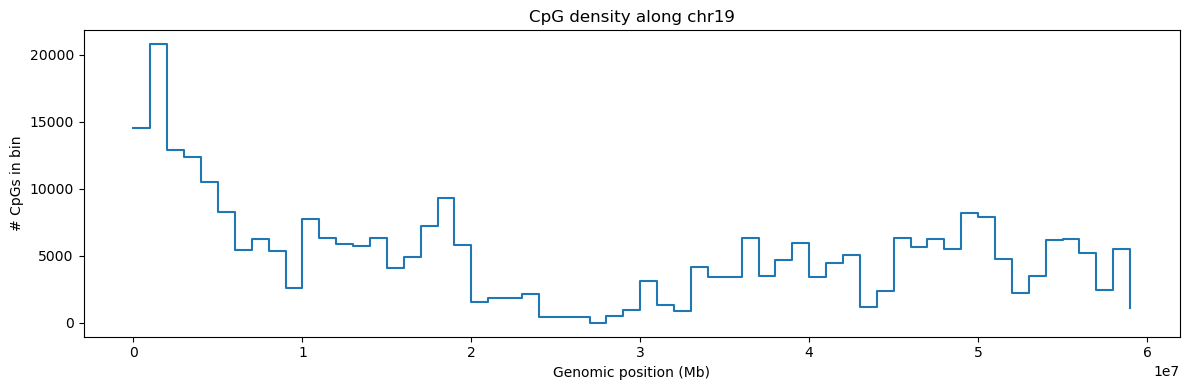

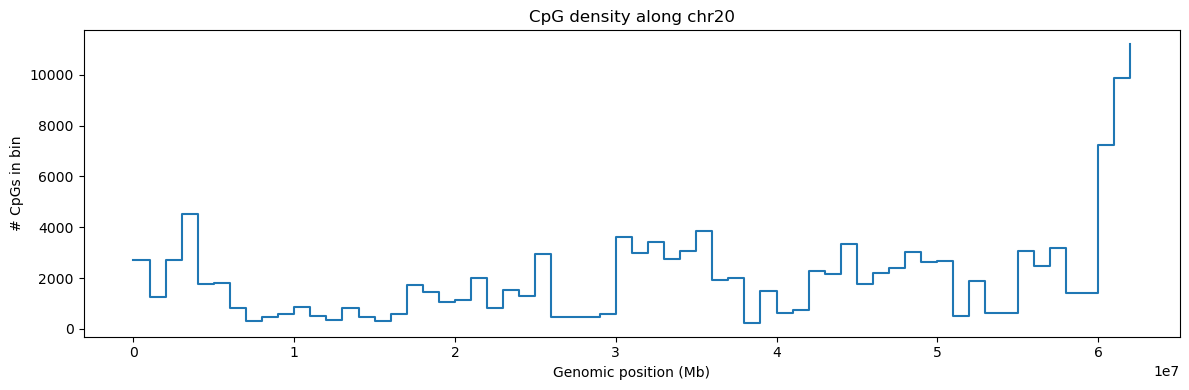

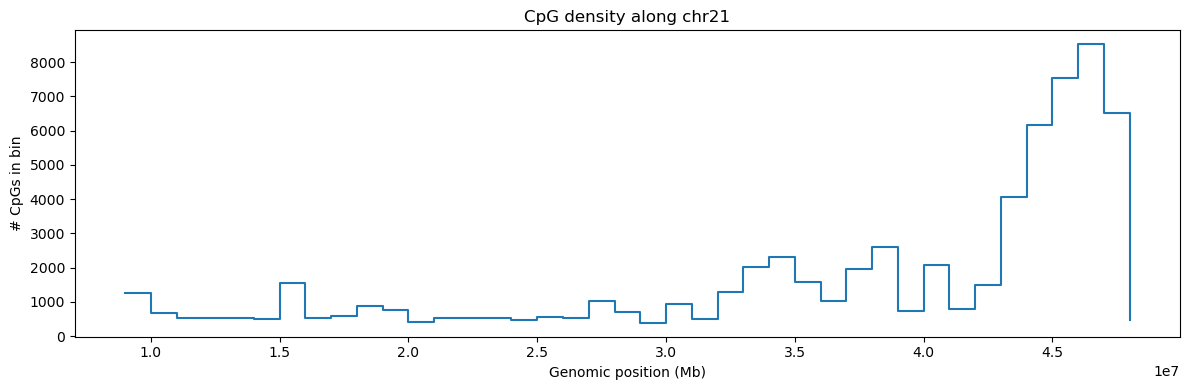

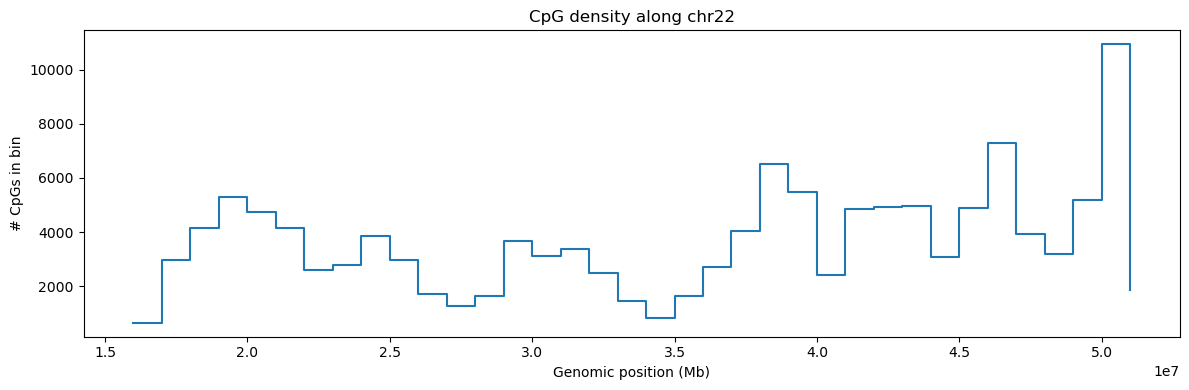

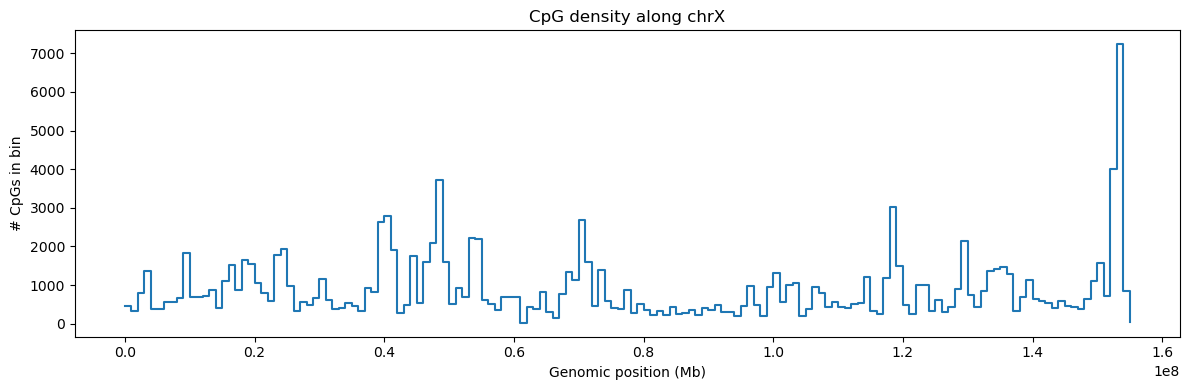

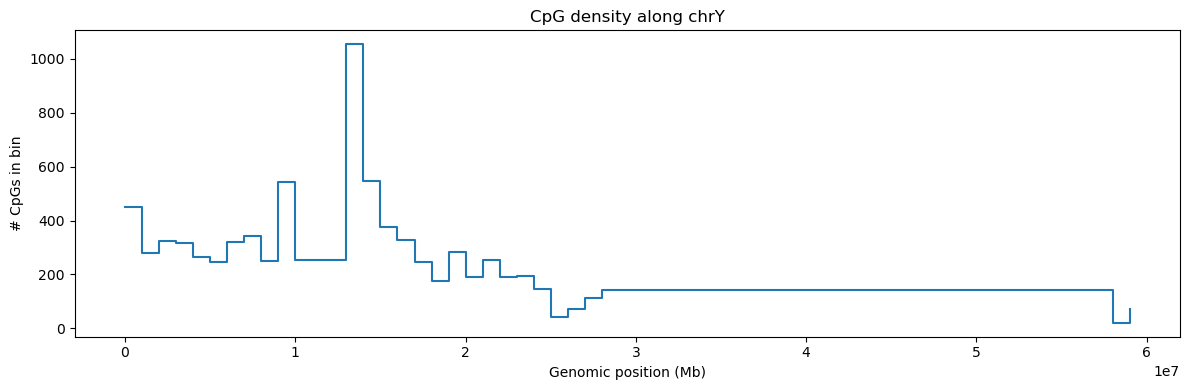

In [44]:
bin_size = 1_000_000

for chr in ordered_chrs:
    chr_data = matrix[matrix["chr"] == chr].copy()
    chr_data["bin"] = (chr_data["cpg_pos"] // bin_size) * bin_size
    counts = chr_data.groupby("bin").size()

    plt.figure(figsize=(12, 4))
    plt.plot(counts.index, counts.values, drawstyle="steps-post")
    plt.title(f"CpG density along {chr}")
    plt.xlabel("Genomic position (Mb)")
    plt.ylabel("# CpGs in bin")
    plt.tight_layout()
    plt.show()



/tmp/ipykernel_706224/3855732052.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned = matrix.groupby(["chr", "bin"]).size().reset_index(name="count")


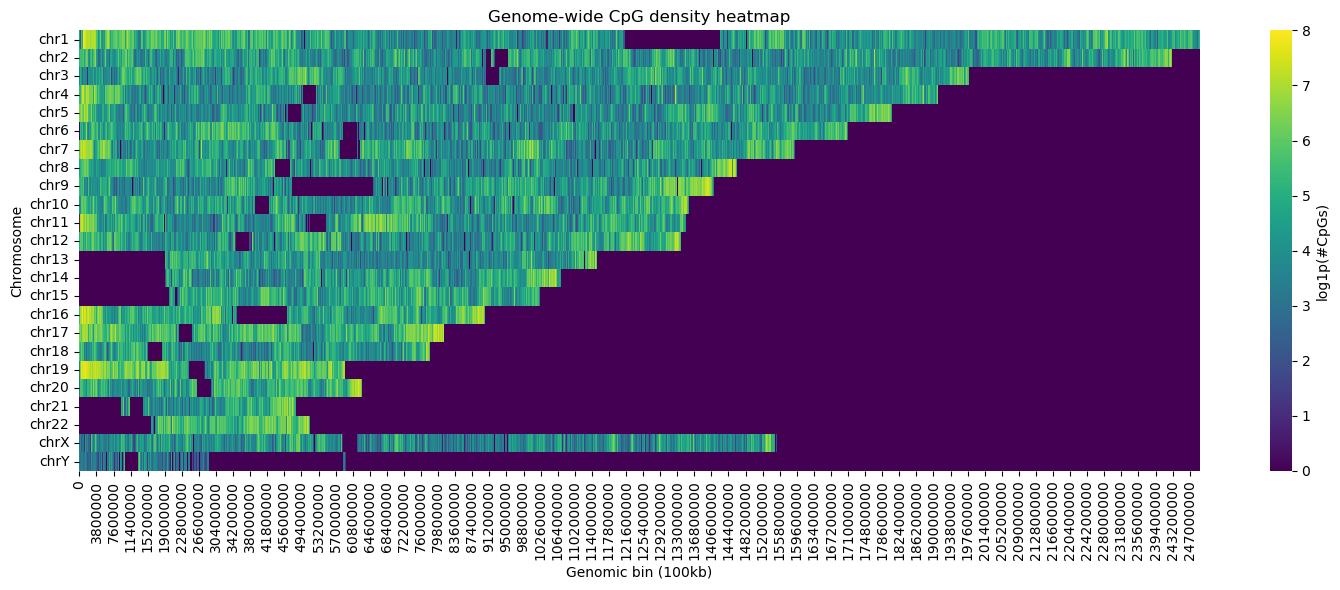

In [50]:
bin_size = 100_000

import seaborn as sns
import numpy as np

matrix["bin"] = (matrix["cpg_pos"] // bin_size) * bin_size
binned = matrix.groupby(["chr", "bin"]).size().reset_index(name="count")
heatmap_data = binned.pivot(index="chr", columns="bin", values="count").fillna(0)

plt.figure(figsize=(15, 6))
sns.heatmap(np.log1p(heatmap_data), cmap="viridis", cbar_kws={"label": "log1p(#CpGs)"})
plt.title("Genome-wide CpG density heatmap")
plt.xlabel("Genomic bin (100kb)")
plt.ylabel("Chromosome")
plt.tight_layout()
plt.show()
